<a href="https://colab.research.google.com/github/goulartsursula/disciplinas-uerj/blob/master/espectroscopia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

y = (28454.333605887387 +- 4352.898634463544)x +( 1667.4428545470782 +- 557.7752668217282)


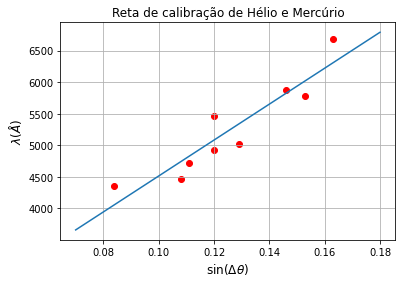

y = (0.0005292422202006163 +- 0.00010687195081671026)x +( 6.308819417661349e-05 +- 1.98821173332164e-05)


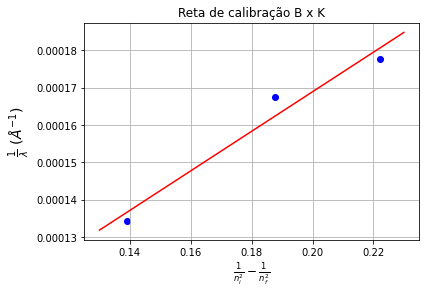

In [41]:
import numpy as np
import matplotlib.pyplot as plt

#Ajuste Helio e Mercurio
x = np.array([0.108, 0.111, 0.120, 0.129, 0.146, 0.163, 0.084, 0.120, 0.153])
y = np.array([4471, 4713, 4922, 5015, 5876, 6678, 4358.3, 5460.7, 5780.2])

def lsq_sq(x, y):  
  n = np.size(x)
  mx, my = np.mean(x), np.mean(y)

  cov = np.mean(x * y) - mx * my
  var = np.var(x)

  a = cov/var
  b = my - a *mx

  ey = np.sqrt(np.sum(np.power(y - (a * x + b),2) / (n - 2)))
  
  erro_a = ey / (np.sqrt(var) * np.sqrt(n))
  erro_b = erro_a * np.sqrt(np.mean(np.power(x, 2)))

  print(f'y = ({a} +- {erro_a})x +' + f'( {b} +- {erro_b})')
  return a, erro_a, b, erro_b

parametros = lsq_sq(x, y)

#Grafico Helio e Mercurio
x1 = np.linspace(0.07, 0.18, 1000)
y1 = parametros[0]*x1 + parametros[2]

plt.plot(x1, y1)
plt.scatter(x, y, color = 'red')
plt.xlabel(r'sin(${\Delta} {\theta}$)', fontsize=12)
plt.ylabel('${\lambda}(\AA)$', fontsize=12)
plt.title('Reta de calibração de Hélio e Mercúrio')
plt.grid(True)
plt.show()

#Ajuste B X K
href = 348
htheta = np.array([340.0, 339.3, 336.3])
hthetasin = np.sin((href-htheta)*np.pi/180)
n = np.array([6, 4, 3])
y = parametros[0] * hthetasin + parametros[2]
K = 1/y
B = (1/4) - (1/(n**2))

parametros3 = lsq_sq(B, K)

#Grafico B X K
xj = np.linspace(0.13, 0.23, 2)
yj = parametros3[0]*xj + parametros3[2]

plt.xlabel(r'$\frac{1}{n_i^2} - \frac{1}{n_f^2}$', fontsize = 12)
plt.ylabel(r'$\frac{1}{\lambda} \ (\AA^{-1})$', fontsize = 14)
plt.title('Reta de calibração B x K')
plt.plot(xj, yj, color="red")
plt.scatter(B, K, color="blue")
plt.grid(True)
plt.show()




In [48]:
abs(0.5292422202006163 - 1.09737316)

0.5681309397993838

In [44]:
2*0.10687195081671026

0.21374390163342052